### Задача 3. Минимизация негладкой функции

1.Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

In [38]:
import numpy as np

def f1(x):
    return math.sin(x / 5.0) * math.exp(x / 10.0) + 5.0 * math.exp(-x / 2.0)

def f(x):
    return int(f1(x))

xlist = np.arange(1,30, 0.1)

2.Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

<function matplotlib.pyplot.show>

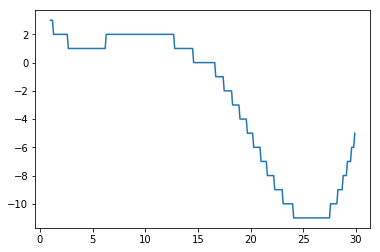

In [39]:
import matplotlib.pyplot as plt
import math

plt.plot(xlist, [f(x) for x in xlist] )
plt.show

3.Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.

In [40]:
import scipy.optimize as opt
res = opt.minimize(f, 30, method = "BFGS")
print res

results = {}
results[0] = str(res.fun)
print results



      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])
{0: '-5'}


4.Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

In [41]:
xxx = [(0,30)]
res = opt.differential_evolution(f, xxx)
print res

results[1] = str(res.fun)

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 4
 success: True
       x: array([24.72228265])


5.Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

6.Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

In [42]:
string = results[0] + " " + results[1]
file_obj = open('submission-3.txt', 'w')
file_obj.write(string)
file_obj.close
print string

-5 -11.0
